# K-Means

In [293]:
# import data from sklearn 
from sklearn.datasets import make_blobs

In [294]:
X,y = make_blobs(n_samples=150,n_features=2,centers=5,cluster_std=1,shuffle=True,random_state=1)

In [295]:
# visualize the data 
import matplotlib.pyplot as plt

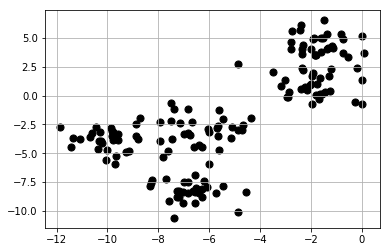

In [296]:
plt.scatter(X[:,0],X[:,1],c='black',marker='o',s=50)
plt.grid()
plt.show()

In [297]:
# define the K-means class
import numpy as np


In [298]:
def dist(X,x):
    """Calculate the Euclidean distance between 
    a sample and the k centroids"""
    return [np.linalg.norm(x-x1) for x1 in X]

class KMeans(object):
    """The simple K-means algorithm"""
    def __init__(self,k=1,random_state=5,tol=1,N_max=100):
        self.k = k
        self.random_state=5
        self.tol=tol
        self.N_max=N_max
        
    def fit(self,X):
        rgen = np.random.RandomState(self.random_state)
        N,Nfeatures = X.shape
        ind = rgen.randint(low=0,high=N,size=self.k)
        centroids = X[ind,:]
        # label the samples
        D=[ dist(centroids,x) for x in X]
        y_old=np.argmin(D,axis=1)
        
        
        ii = 0
        err = np.inf
        while ii< self.N_max and err > self.tol:
            
            #print(centroids)
            # update the centroids
            centroids = np.array([ np.mean(X[y_old==lb,:],axis=0) for lb in np.unique(y_old)])
            D=np.array([ dist(centroids,x) for x in X])
            y_new=np.argmin(D,axis=1)

            err = (y_old!=y_new).sum()
            y_old=y_new
            
            ii+=1
            
        self.y = y_old
        self.cluster_centers_=centroids
        return self

In [299]:
class KMeansPP(object):
    """The K-means ++ algorithm,
    which choose the centroids smartly.
    Reference: Python_Machine_learning_with_Scikit_and_TensorFlow
    Implementation: Wensheng Sun"""
    def __init__(self,k=1,random_state=5,tol=1,N_max=100):
        self.k = k
        self.random_state=5
        self.tol=tol
        self.N_max=N_max
        
    def fit(self,X):
        rgen = np.random.RandomState(self.random_state)
        N,Nfeatures = X.shape
        
        
        M = []
        pmf = np.ones(N)/N
        # smart start of KMeans++
        for _ in range(0,self.k):
            ind = rgen.choice(np.arange(0,len(pmf)),p=pmf,size=1)
            M.append(ind)
            #print(np.array(M))
            ind_rest = [x for x in range(0,N) if x not in M]
            D=np.array([ np.min(dist(X[M,:],x)) for x in X[ind_rest,:]])
            #print(D)
            pmf = D/D.sum()
        
        centroids = X[M,:]
        # label the samples
        D=[ dist(centroids,x) for x in X]
        y_old=np.argmin(D,axis=1)
        
        
        ii = 0
        err = np.inf
        while ii< self.N_max and err > self.tol:
            
            #print(centroids)
            # update the centroids
            centroids = np.array([ np.mean(X[y_old==lb,:],axis=0) for lb in np.unique(y_old)])
            D=np.array([ dist(centroids,x) for x in X])
            y_new=np.argmin(D,axis=1)

            err = (y_old!=y_new).sum()
            y_old=y_new
            
            ii+=1
            
        self.y = y_old
        self.cluster_centers_=centroids
        return self

In [300]:
import numpy as np
import math

def norm(x):
    return np.linalg.norm(x)

class FCM(object):
    """The Fuzzy C-Means algorithm,
    which uses soft clustering instead of hard clustering.
    Reference: Python_Machine_learning_with_Scikit_and_TensorFlow
    Implementation: Wensheng Sun"""
    def __init__(self,k=1,random_state=5,tol=1,N_max=100,m=2):
        self.k = k # number of clusters
        self.random_state=5
        self.tol=tol
        self.N_max=N_max
        self.m = m # fuzziness coefficient
        
    def centroids(self,X,W=None):
        if W is None:
            W = np.ones((X.shape[0],self.k))/self.k
        centroids=np.array([w.dot(X)/w.sum() for w in W.T])
        return centroids
    
    def update_member(self,X,cent):
        W = np.zeros((X.shape[0],self.k))
        for ii in range(0,X.shape[0]):
            for jj in range(0,self.k):
                tmp = norm(X[ii,:]-cent[jj])/[norm(X[ii,:]-c) for c in cent]
                w_tmp = np.array([math.pow(t,2/(self.m-1)) for t in tmp]).sum()
                W[ii,jj] = math.pow(w_tmp,-1)
        return W
    
    
    
    def fit(self,X):
        rgen = np.random.RandomState(self.random_state)
        N,Nfeatures = X.shape

        W = rgen.normal(loc=0,scale=1,size=(N,self.k)) # randomly assign membership
        W = np.array([w/w.sum() for w in W]) # normalize the weights
        
        cent = self.centroids(X,W)

        # update the cluster membership i.e. W
        W = self.update_member(X,cent)
        ii=0

        while ii< self.N_max:
            cent = self.centroids(X,W)
            # update the cluster membership i.e. W
            W = self.update_member(X,cent)
            ii+=1
            
        self.W = W
        self.cluster_centers_=cent
        return self

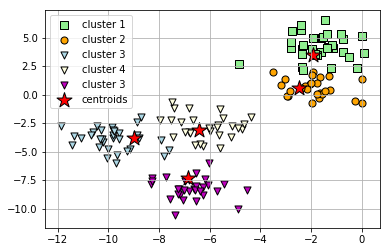

In [301]:
km = FCM(k=5,tol=0)
km.fit(X)
y_km = np.argmax(km.W,axis=1)
#print(km.cluster_centers_)

# visualize the results
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='cluster 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='cluster 3')
plt.scatter(X[y_km == 3, 0],
            X[y_km == 3, 1],
            s=50, c='lightyellow',
            marker='v', edgecolor='black',
            label='cluster 4')
plt.scatter(X[y_km == 4, 0],
            X[y_km == 4, 1],
            s=50, c='M',
            marker='v', edgecolor='black',
            label='cluster 3')
plt.scatter(km.cluster_centers_[:,0],
            km.cluster_centers_[:,1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()
